# Day 10 - Plotting in Python

## Plotting with `matplotlib`

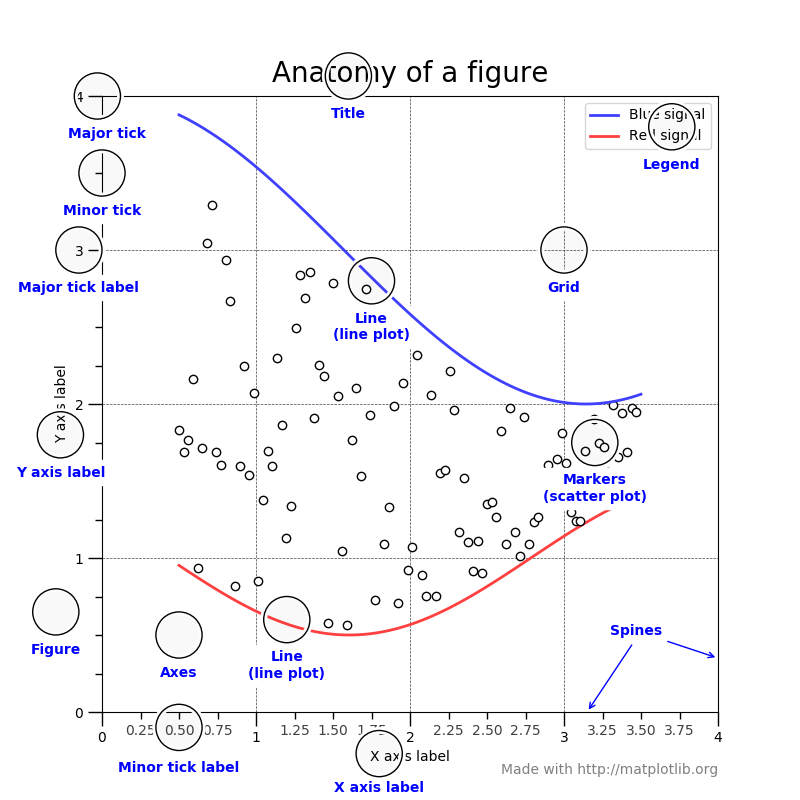

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('classic') 

In [ ]:
# line 1 points
x1 = [10,20,30,40,50,60]
y1 = [20,40,10,15,60,35]

# plotting the line 1 points 
plt.plot(x1, y1, label = "Name line 1")

# line 2 points
x2 = [10,20,30,40,50,60]    # could have been just x2=x1; 
                            # or you could have just defined single x variable
                            # and used it in both plots
y2 = [40,10,30,25,5,55]

# plotting the line 2 points 
plt.plot(x2, y2, label = "Name line 2")
plt.xlabel('x - axis')

# Set the y axis label of the current axis.
plt.ylabel('y - axis')

# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')

# show a legend on the plot
plt.legend(loc='best')      # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

# Display a figure.
plt.show()

### Generate random data

In [ ]:
# Standard Normal distribution
x=np.random.randn(1000)

# 'Non-standard' Normal distribution
mu=3         # location
sigma=1      # scatter
y=np.random.normal(mu,sigma,1000)

### Plot histograms

In [ ]:
plt.hist(x)
plt.show() # this command suppresses irrelevant output from the previous one. Try commenting this line out

In [ ]:
plt.hist(y)
plt.show()

### Subplots

For more options see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1)

In [ ]:
axes

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1)
axes[0].hist(x)
axes[1].hist(y)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
ax1.hist(x)
ax2.hist(y)
plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2)
axes[0,0].hist(x)
axes[1,1].hist(y)
plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
axes[0,0].hist(x)
axes[1,1].hist(y)
plt.show()

### Control figure size and DPI (dots per inch; larger values = higher quality = slower responce)

See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure

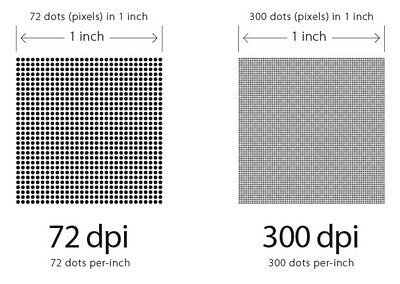

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(18,6),dpi=100)
axes[0].hist(x)
axes[1].hist(y)
plt.show()

### Overlay Histogram with Plot

In [ ]:
count, bins, ignored = plt.hist(y, 30, density=True)


The general form of its probability density function is $f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$

In [ ]:
count, bins, ignored = plt.hist(y, 30, density=True) # same as above
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    linewidth=2, color='r')
plt.show()

### Choose one of the predefined styles in `matplotlib` library
More on this [here](https://matplotlib.org/3.1.0/users/dflt_style_changes.html).

In [ ]:
plt.style.use('seaborn') 
# default, classic, bmh, dark_background, fast, fivethirtyeight, ggplot, seaborn, seaborn-paper
count, bins, ignored = plt.hist(y, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    linewidth=2, color='r')
plt.show()

In [ ]:
print(plt.style.available)

### Define your own signature style


**Composing styles**  

Style sheets are designed to be composed together. So you can have a style sheet that customizes colors and a separate style sheet that alters element sizes for presentations. These styles can easily be combined by passing a list of styles:  

`plt.style.use(['dark_background', 'presentation'])`

You can create custom styles and use them by calling `style.use` with the path or URL to the style sheet. Additionally, if you add your `<style-name>.mplstyle` file to `mpl_configdir/stylelib`, you can reuse your custom style sheet with a call to `style.use(<style-name>)`. By default `mpl_configdir` should be `~/.config/matplotlib`, but you can check where yours is with `matplotlib.get_configdir()`; you may need to create this directory. You also can change the directory where matplotlib looks for the `stylelib/` folder by setting the `MPLCONFIGDIR` environment variable.  

Note that a custom style sheet in `mpl_configdir/stylelib` will override a style sheet defined by `matplotlib` if the styles have the same name.  

For example, you might want to create `mpl_configdir/stylelib/presentation.mplstyle` with the following:  

`axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16`  

Examples of the existing styles are located in your directory `style files for tweaking`. Pick the one you like the most, and change a few things in the file. Rename and include in the `mpl_configdir` to later usage, if you wish.

In [ ]:
import matplotlib
matplotlib.get_configdir()

**Dynamic rc settings**  

You can also dynamically change the default `rc` settings in a python script or interactively from the python shell. All of the `rc` settings are stored in a dictionary-like variable called `matplotlib.rcParams`, which is global to the matplotlib package. `rcParams` can be modified directly, for example:

In [ ]:
plt.plot(x); plt.show()

In [ ]:
# check the entire list of parameter keys you can tweak:
plt.rcParams.keys()

When plotting, one or several lines in a plot, the function cycles through a set of predetermined colors. For example, you may have noticed from our past examples, that every time you plot a line, its color is blue, the second line added to the same plot will be green.

The default color cycle is: `['b', 'g', 'r', 'c', 'm', 'y', 'k']`

You can modify the defualt list of colors the plot cycles through by tweaking the list as follows

- `from cycler import cycler`  - import it only once
- `matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['g', 'r', 'm'])` - use it any time you want to change the current cycle of colors.

You can find the definition of all available color names [here](https://matplotlib.org/3.1.1/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py).

In [ ]:
matplotlib.rcParams['lines.linewidth'] = 5

from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['g', 'r', 'm'])

plt.plot(x); plt.show()

In [ ]:
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['olive', 'r', 'm'])
plt.plot(x); plt.show()

In [ ]:
matplotlib.rc('lines', linewidth=0.5)
plt.plot(x); plt.show()

The `matplotlib.rcdefaults()` command will restore the standard matplotlib default settings.

In [ ]:
matplotlib.rcdefaults()
plt.plot(x); plt.show()

### Temporary styling
If you only want to use a style for a specific block of code but don't want to change the global styling, the style package provides a context manager for limiting your changes to a specific scope. To isolate your styling changes, you can write something like the following

In [ ]:
with plt.style.context('dark_background'):
    plt.hist(y, 30, density=True)
plt.show()

### Adding transparency

In [ ]:
plt.hist(y, 30, density=True, alpha=0.5)
plt.hist(x, 30, density=True, alpha=0.5)
plt.show()

In [ ]:
with plt.style.context(['classic','seaborn']):   # try removing classic or seaborn options
    plt.hist(y, 30, density=True, alpha=0.5)
    plt.hist(x, 30, density=True, alpha=0.5)
plt.show() 

## Scatterplots

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html


In [ ]:
points = 500
data = np.zeros([points,3])
x = np.random.rand(points)*100
y = np.random.rand(points)*100
z = np.sinc((x-20)/100*3.14) + np.sinc((y-50)/100*3.14)

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1)

ax.scatter(x, y, marker="o", c="orange", edgecolors="darkgreen", s=200, alpha=0.5)
# Try filled markers types from ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('My figure title',fontsize=20)

plt.axis('tight')                                   # sets tight layout
#plt.autoscale(enable=True, axis='x', tight=True)    # sets tight layout for X or Y axis only!
plt.show()

### Add a 3rd dimension to your 2D plot!

In [ ]:

s=[(y[i]/x[i])**2 for i in range(len(x))]
#s=[(y[i]-x[i])**2 for i in range(len(x))]

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y, marker="o", c="orange", edgecolors="darkgreen", s=s, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('My figure title',fontsize=20)
plt.axis('tight')                                   # sets tight layout
plt.show()

## 3D plotting
See 3D plot tutorial here: https://matplotlib.org/tutorials/toolkits/mplot3d.html#toolkit-mplot3d-tutorial

In [ ]:
from mpl_toolkits.mplot3d import axes3d
# Sometimes, in online examples, you may see:
# from mpl_toolkits import mplot3d

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

### Points and Lines

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


In [ ]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

In [ ]:
n = 100

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
# ax.view_init(15, 45) # view_init(elev,azim) can be used to rotate the axes
plt.show()

In [ ]:
# The default values for elevation and azimuth: 
print(ax.azim)
print(ax.elev)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

### 3D surface plot - from data

In [ ]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
# url = 'data/volcano.csv' # if the link no longer has data available
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
df

In [ ]:
# Make the plot
fig = plt.figure(figsize=(18,12))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.1) # play with parameters above: cmap: spring/summer/etc, linewidth:

#fig.colorbar(surf, shrink=0.5, aspect=5)   # add a color bar which maps values to colors. Tip: first argument must be a reference to a surface object
#ax.view_init(30, 45)                        # Rotate it

plt.show()


## Advanced 3D plotting: Interactive graphs with plotly

See examples at 

- https://plot.ly/python/3d-scatter-plots/
- https://plot.ly/python/3d-surface-plots/

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [ ]:
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
df=pd.DataFrame({'Variable X':x,'Variable Y':y,'Variable Z':z})
df

In [ ]:
fig = px.scatter_3d(df,x='Variable X', y='Variable Y', z='Variable Z',
              size_max=18,
              opacity=0.7)

# tight layout
fig.update_layout()

In [ ]:
df = px.data.iris()
df

In [ ]:
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='petal_length', size='petal_length', size_max=18,
              symbol='species', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [ ]:
# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

In [ ]:
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()

# References
Some links to the documentation that you may find useful:

- Random sampling
    - https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html
- matplotlib styles
    - https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html